<div class="titulo-capitulo" style="background-color: darkblue; color: white; text-align: center;">
    <br>
    <h1>Clase Laboratorio Nº4: Repaso Unidad I</h1> 
    <br>
    <div style="text-align: left">Autor      : Fiorella Roco Parra&nbsp;&nbsp;&nbsp;&nbsp;</div>
    <div style="text-align: left">Asignatura : Optimización&nbsp;&nbsp;&nbsp;&nbsp;</div>
    <div style="text-align: left">Fecha      : 30.04.2024&nbsp;&nbsp;&nbsp;&nbsp;</div>
    <div style="text-align: left">Correo     : froco@ucm.cl&nbsp;&nbsp;&nbsp;&nbsp;</div>
</div>


In [3]:
import pandas as pd 
import numpy as np
import time as time 
from sympy import * 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d # Lo utilizamos para la generacion de graficos 3D

# Contenido
1. Ejercicios Fuerza bruta
   * Una Variable
   * Varias Variables
2. Máximos y mínimos por medio de Hessiana
   * Varias Variables
3. Distribuciones de probabilidad
   * Uniforme
   * Normal
4. Método de Newton-Raphson
   * Normal
   * Componente Aleatoria

# Ejercicios:
 # I. Fuerza bruta

a) Un agricultor desea maximizar el rendimiento de su cultivo utilizando diferentes tipos de fertilizantes. La función que representa el rendimiento del cultivo en función del tipo de fertilizante aplicado (en kilogramos por hectárea) es: 
$$
𝑓(𝑥)=50𝑥−2.3𝑥^2
$$
donde 𝑥 es el tipo de fertilizante aplicado. Encuentra la cantidad optima de fertilizante que maximiza el rendimiento del cultivo.
Considere el intervalo dado por (0, 30)


b) Una fábrica de pinturas produce una amplia variedad de colores utilizando tres colores primarios: rojo, azul y amarillo. Estos colores primarios se mezclan en diferentes proporciones para producir los tonos deseados. La fábrica necesita determinar la cantidad óptima de cada color primario que debe utilizar para maximizar la calidad y el rendimiento de sus pinturas.

Cada color primario tiene un costo asociado y también contribuye de manera diferente al rendimiento de la pintura final. Por ende, la fábrica necesita determinar la cantidad óptima de cada color primario (rojo, azul y amarillo) que debe utilizarse en la producción de las pinturas para maximizar el rendimiento, considerando la función que relaciona la cantidad de cada color primario con el rendimiento de la pintura, esta dada por: 
$$
f(x, y, z) = 10x + 8y + 15z + 5xy2z
$$
Donde:
- $x$: Cantidad de rojo utilizado.
- $y$: Cantidad de azul utilizado.
- $z$: Cantidad de amarillo utilizado.

Calcular: 
 * Para el intervalo (-10, 5). Grafique.
 * Completar la tabla y graficar los tiempos de ejecución.
 
    | Cantidad de Iteraciones| Costo Computacional (segundos) |
    |------------------------|--------------------------------|
    | 10                     |                                |
    | 20                     |                                |
    | 50                     |                                |
    | 100                    |                                |
    | 300                    |                                |
   


<div class="titulo-capitulo" style="background-color: darkblue; color: white; text-align: center;">
    <br>
    <h1>Solución: Fuerza Bruta</h1> 
    <br>
</div>

In [2]:
#### Solución (a) ####

start_time =  time.perf_counter() # Inicio contedo del tiempo de cómputo

def function(x):
    return 50*x-2.3*x**2

start = 0 # Define el Incio el intervalo
stop = 20 # Define el Final del intervalo
num = 1000 # Define la Cantidad de numeros a generar

x = np.linspace(start,stop,num) #Genera array de numeros donde 

value = -np.inf # Definición valor inicial para comparar
#               --> Nota: representa a un valor infinito. Generalmete es utilizado para realizar comparaciones.
for a1 in x:
    val_fun = function(a1)
    if val_fun > value:
        value = val_fun
        parameters = [round(a1), round(value)] # valor de x, valor f(x) 
        
total_time =  time.perf_counter() - start_time # calculo del tiempo de cómputo

print("Solution =", parameters, end="\n")
print("Tiempo de ejecución: ", total_time)

Solution = [11, 272]
Tiempo de ejecución:  0.004867675990681164


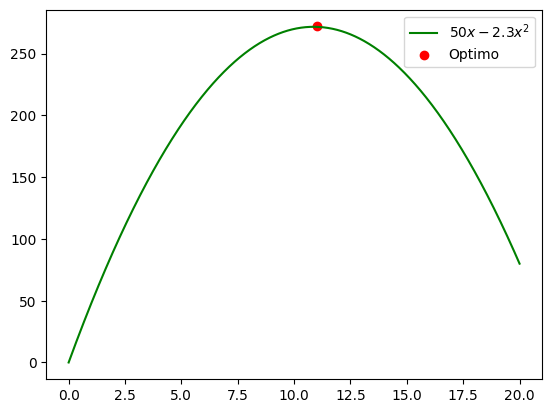

In [3]:
plt.plot(x,function(x), color = "green", label = "$50x-2.3x^2$")
plt.scatter(parameters[0], parameters[1], color = "red", label = "Optimo")

plt.legend()



In [4]:
#### Solución (b.1) ####

start_time =  time.perf_counter() # Inicio contedo del tiempo de cómputo

def function(x,y,z):
    return 10*x + 8*y + 15*z + 5*x*y*2*z

start = -10
stop = 5
num = 100

x = np.linspace(start,stop,num) #Genera array de numeros donde 
y = x
z = y
value = -np.inf # Definición valor inicial para comparar
#               --> Nota: representa a un valor infinito. Generalmete es utilizado para realizar comparaciones.
for a1 in x:
    for a2 in y:
        for a3 in z:
            val_fun = function(a1,a2,a3)
            if val_fun > value:
                value = val_fun
                parameters = [round(a1,3), round(a2,2),round(a3),round(value)] # valor de x, valor f(x) 
                
total_time =  time.perf_counter() - start_time # calculo del tiempo de cómputo

print("Solution =", parameters, end="\n")
print("Tiempo de ejecución: ", total_time)



Solution = [-10.0, -10.0, 5, 4895]
Tiempo de ejecución:  1.4083572430008644


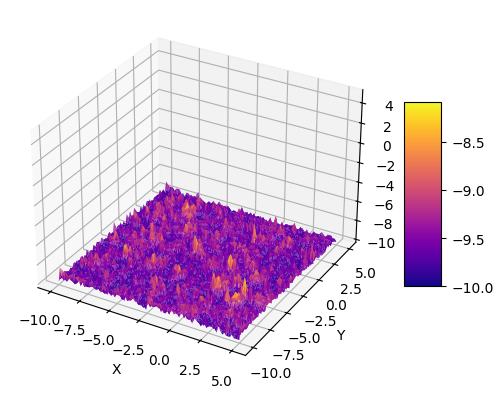

In [5]:
#%matplotlib notebook 
# Definir la función
def funcion(x, y, z):
    return 10*x + 8*y + 15*z + 5*x*y*2*z

# Crear datos para graficar
x = np.linspace(-10, 5, 100)
y = x
z = y
X, Y, Z = np.meshgrid(x, y, z)
F = funcion(X, Y, Z)

# Aplanar los datos
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
F = F.flatten()

# Graficar
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(X, Y, Z, cmap='plasma', linewidth=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [5]:
#### Solución b.2 ####

def function(x,y,z):
    return 10*x + 8*y + 15*z + 5*x*y*2*z

steps = [10, 20, 50, 100, 300]
time_list = [] 

def run_code(i):
    x = np.linspace(-10,20,i)
    y = x
    z = y
    cost = -np.inf
    count = 0
    for a1 in x:
        for a2 in y:
            for a3 in z:
                count +=1
                cost_fun = function(a1,a2,a3)
                if cost_fun > cost:
                    cost = cost_fun
                    parameters = [a1,a2,a3]
    #print("parameters =", cost, parameters, count)

for i in steps: 
    start_time =  time.perf_counter() 
    run_code(i) 
    total_time =  time.perf_counter() - start_time 
    time_list.append(total_time)
print("total time =", total_time)
time_list

total time = 32.052594655000576


[0.0019301770007587038,
 0.010842754001714638,
 0.1912873369983572,
 1.1066406200006895,
 32.052594655000576]

In [6]:
df = pd.DataFrame()
df["Cantidad de Iteraciones"] = steps
df["Costo Computacional (segundos) "] = time_list
df

,Cantidad de Iteraciones,Costo Computacional (segundos)
0,10,0.001930
1,20,0.010843
2,50,0.191287
3,100,1.106641
4,300,32.052595


Text(0, 0.5, 'Time (s)')

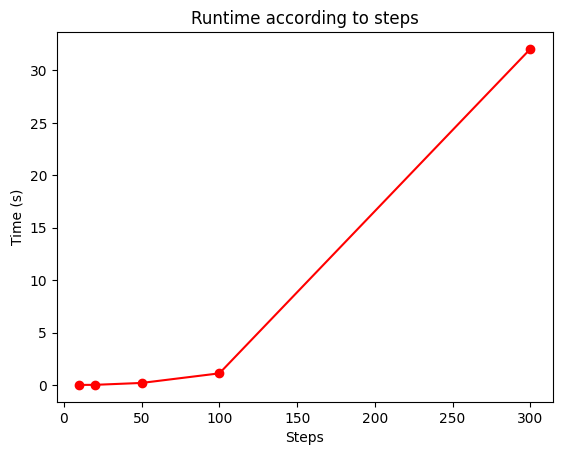

In [7]:
plt.plot(steps,time_list,"-o", color ="red")
plt.title("Runtime according to steps")
plt.xlabel("Steps")
plt.ylabel("Time (s)")

# II. Máximos y mínimos por medio de Hessiana

 
 Determinar los puntos criticos y determinantes segun corresponda corresponda. De ser posible graficar.

 Recordemos: 


 <center>
    <img width="350px" alt="Falta el directorio de figura" src="Hessiana.png" align="center"
</center>


<div style="text-align: left">Criterio de Sylverster.&nbsp;&nbsp;&nbsp;&nbsp;</div>
    <br>
    
<center>
    <img width="350px" alt="Falta el directorio de figura" src="Sylverster.png" align="center" />
</center>
 
a) $F(x,y)= x^3 + 3xy^2 - 15x - 12y$ (Propuesto)
    
b) $F(x,y,z)= x^2+y^2+z^2+x−xy−z$
    
c) $F(x,y,z,w)= 13x^3+46x^2+0.3y^2+2.3z^2−xy+ x−2z+0.5w^2+2w$
    
d) $F(x,y,z,w,u,v)=-95x^3+10x^2+1.2y^2+4z^2-xy+4x-2z+0.3w^2+3w-0.5u^2+2v^2-uv$ 
    

<div class="titulo-capitulo" style="background-color: darkblue; color: white; text-align: center;">
    <br>
    <h1>Solución: Métodos de optimización</h1> 
    <br>
</div>

In [9]:
#### Solución (b)

x, y, z = var('x y z') # Generamos las variables 
f = x**2 + y**2 + z**2 - x*y + x - z #Agregamos la funcion a estudiar

H = hessian(f, (x,y,z)) # Creamos la Hessiana

# Calculamos las primeras derivadas parciales
dfx = Derivative(f, x).doit() 
dfy = Derivative(f, y).doit() 
dfz = Derivative(f, z).doit()

# Getting critical points
sols = solve((dfx, dfy, dfz), (x, y, z)) 
print("Puntos criticos: ",sols)
H # print(H) 

Puntos criticos:  {x: -2/3, y: -1/3, z: 1/2}


Matrix([
[ 2, -1, 0],
[-1,  2, 0],
[ 0,  0, 2]])

In [10]:
#### Solución (b) ####

x, y, z = var('x y z') # Generamos las variables 
f = x**2 + y**2 + z**2 - x*y + x - z #Agregamos la funcion a estudiar

H = hessian(f, (x,y,z)) # Creamos la Hessiana

# Calculamos las primeras derivadas parciales
dfx = Derivative(f, x).doit() 
dfy = Derivative(f, y).doit() 
dfz = Derivative(f, z).doit()

# Getting critical points
sols = solve((dfx, dfy, dfz), (x, y, z)) 
print("Puntos criticos: ",sols)
H # print(H) 

Puntos criticos:  {x: -2/3, y: -1/3, z: 1/2}


Matrix([
[ 2, -1, 0],
[-1,  2, 0],
[ 0,  0, 2]])

In [11]:
#### Solución (c) ####

# Definicion de variables
x, y, z, w = var('x y z w')

#Definicion de funcion a estudiar 
f = 13*x**3 + 46*x**2 + 0.3*y**2 + 2.3*z**2 - x*y + x - 2*z + 0.5*w**2 + 2*w
# Definicion de Hessiana
H = hessian(f, (x,y,z,w)) 


# Calculo de derivadas parciales 
fx = diff(f, x)
fy = diff(f, y)
fz = diff(f, z)
fw = diff(f, w)

# Obtención de puntos criticos
solutions = solve((fx, fy, fz, fw), (x, y, z, w)) 
print("Puntos criticos: ", solutions, end="\n\n")

# Calculating solutions by means of Substitution (subs)
for sol in solutions: 
    a = sol[0]
    b = sol[1]
    c = sol[2]
    d = sol[3]
    H4 = H.subs([(x,a),(y,b),(z,c),(w,d)]) 
    det4 = det(H4)
    H3 = H4.minor_submatrix(3,3)
    det3 = det(H3)
    H2 = H3.minor_submatrix(2,2)
    det2 = det(H2)
    H1 = H2.minor_submatrix(1,1)
    det1 = det(H1)
    
print("Determinantes:", det1, det2, det3, det4)
H

Puntos criticos:  [(-2.30511578578625, -3.84185964297709, 0.434782608695652, -2.00000000000000), (-0.0111235304530613, -0.0185392174217688, 0.434782608695652, -2.00000000000000)]

Determinantes: 91.1323646246612 53.6794187747967 246.925326364065 246.925326364065


Matrix([
[78*x + 92,  -1,   0,   0],
[       -1, 0.6,   0,   0],
[        0,   0, 4.6,   0],
[        0,   0,   0, 1.0]])

In [2]:
# Solución (d)

# Definicion de variables
x, y, z, w, u, v = var('x y z w u v')

#Definicion de funcion a estudiar 
f = -95*x**3 + 10*x**2 + 1.2*y**2 + 4*z**2 - x*y + 4*x - 2*z + 0.3*w**2 + 3*w - 0.5*u**2 + 2*v**2 - u*v

# Definicion de Hessiana
H = hessian(f, (x,y,z,w,u,v)) 


# Calculo de derivadas parciales 
fx = diff(f, x)
fy = diff(f, y)
fz = diff(f, z)
fw = diff(f, w)
fu = diff(f, u)
fv = diff(f, v)

# Obtención de puntos criticos
solutions = solve((fx, fy, fz, fw, fu, fv), (x, y, z, w, u, v)) 
print("Puntos criticos: ", solutions, end="\n\n")

# Calculating solutions by means of Substitution (subs)
for sol in solutions: 
    a = sol[0]
    b = sol[1]
    c = sol[2]
    d = sol[3]
    e = sol[4]
    f = sol[5]
    H6 = H.subs([(x,a),(y,b),(z,c),(w,d),(u,e),(v,f)]) 
    det6 = det(H6)
    
    H5 = H6.minor_submatrix(5,5)
    det5 = det(H5)
    
    H4 = H5.minor_submatrix(4,4)
    det4 = det(H4)
    
    H3 = H4.minor_submatrix(3,3)
    det3 = det(H3)
    
    H2 = H3.minor_submatrix(2,2)
    det2 = det(H2)
    
    H1 = H2.minor_submatrix(1,1)
    det1 = det(H1)
    
    print("Determinantes:", det1, det2, det3, det4, det5,det6)
H

Puntos criticos:  [(-0.0889942873428347, -0.0370809530595144, 0.250000000000000, -5.00000000000000, 0.0, 0.0), (0.157707737635232, 0.0657115573480135, 0.250000000000000, -5.00000000000000, 0.0, 0.0)]

Determinantes: 70.7267437854157 168.744185084998 1349.95348067998 809.972088407989 -809.972088407989 -4049.86044203995
Determinantes: -69.8934104520824 -168.744185084998 -1349.95348067998 -809.972088407989 809.972088407989 4049.86044203995


Matrix([
[20 - 570*x,  -1, 0,   0,    0,  0],
[        -1, 2.4, 0,   0,    0,  0],
[         0,   0, 8,   0,    0,  0],
[         0,   0, 0, 0.6,    0,  0],
[         0,   0, 0,   0, -1.0, -1],
[         0,   0, 0,   0,   -1,  4]])

In [13]:
df = pd.DataFrame()
df["Determinantes"] = round(det1,3), round(det2,3), round(det3,3), round(det4,3), round(det5,3),round(det6,3)
df

,Determinantes
0,-69.893
1,-168.744
2,-1349.953
3,-809.972
4,809.972
5,4049.860


# III. Distribuciones

a. Buscar los máximos. Reolver por distribucion Uniforme y Normal.
 * $f(x,y) = np.sin(4x) - x^2 + 10x + np.cos(3y) - y^2 + 12y$
 * $f(x, y, z) = np.sin(4x) - x^2 + 10x + np.cos(3y) - y^2 + 12y + np.tan(2z) - z^2 + 8z$
 * $f(w, x, y, z) = np.exp(w) + np.sin(4x) - x^2 + 12x + np.cos(3y) - y^2 + 10y + np.tan(2z) - z^2 + 8^z$


<div class="titulo-capitulo" style="background-color: darkblue; color: white; text-align: center;">
    <br>
    <h1>Solución: Distribuciones de probabilidad</h1> 
    <br>
</div>

In [14]:
#### Solución (a1): Uniforme ####

def function(x,y):
    return  np.sin(4*x) - x**2 + 10*x + np.cos(3*y) - y**2 + 12*y
start_time =  time.perf_counter()

cost = -np.inf
count = 0
for i in range (1, 10000):
    a1 = np.random.uniform(0, 10)
    a2 = np.random.uniform(0, 10)
    
    cost_fun = function(a1,a2)
    
    if cost_fun > cost:
        count +=1
        cost = round(cost_fun,4)
        parameters = [round(a1),round(a2)]
        
total_time =  time.perf_counter() - start_time
print("total time =", total_time)
print("parameters =", cost, parameters)


total time = 0.26209183399623726
parameters = 62.8414 [5, 6]


In [15]:
#### Solución (a2): Aleatoria ####

def function(x,y):
    return  np.sin(4*x) - x**2 + 10*x + np.cos(3*y) - y**2 + 12*y
start_time =  time.perf_counter()

cost = -np.inf
count = 0
for i in range (1, 10000):
    a1 = np.random.normal(0, 10)
    a2 = np.random.normal(0, 10)
    
    cost_fun = function(a1,a2)
    
    if cost_fun > cost:
        count +=1
        cost = round(cost_fun,4)
        parameters = [round(a1),round(a2)]
        
total_time =  time.perf_counter() - start_time
print("total time =", total_time)
print("parameters =", cost, parameters)


total time = 0.14009261500905268
parameters = 62.788 [5, 6]


In [16]:
#### Solucion (b1): Uniforme ####

def function(x,y,z):
    return  np.sin(4*x) - x**2 + 10*x + np.cos(3*y) - y**2 + 12*y + np.tan(2*z) - z**2 + 8*z

start_time =  time.perf_counter()

cost = -np.inf
count = 0
for i in range (1, 10000):
    a1 = np.random.uniform(0, 10)
    a2 = np.random.uniform(0, 10)
    a3 = np.random.uniform(0, 10)
    
    cost_fun = function(a1,a2,a3)
    
    if cost_fun > cost:
        count +=1
        cost = round(cost_fun,4)
        parameters = [round(a1),round(a2), round(a3)]
        
total_time =  time.perf_counter() - start_time
print("total time =", total_time)
print("parameters =", cost, parameters)


total time = 0.2765832550066989
parameters = 22779.1147 [1, 8, 5]


In [17]:
#### Solucion (b1): Normal ####

def function(x,y,z):
    return  np.sin(4*x) - x**2 + 10*x + np.cos(3*y) - y**2 + 12*y + np.tan(2*z) - z**2 + 8*z

start_time =  time.perf_counter()

cost = -np.inf
count = 0
for i in range (1, 10000):
    a1 = np.random.normal(0, 10)
    a2 = np.random.normal(0, 10)
    a3 = np.random.normal(0, 10)
    
    cost_fun = function(a1,a2,a3)
    
    if cost_fun > cost:
        count +=1
        cost = round(cost_fun,4)
        parameters = [round(a1),round(a2), round(a3)]
        
total_time =  time.perf_counter() - start_time
print("total time =", total_time)
print("parameters =", cost, parameters)


total time = 0.1966788019926753
parameters = 4094.188 [8, 3, 4]


In [18]:
#### Solucion (c1): Uniforme ####
def function(x,y,z,w):
    return  np.exp(w) + np.sin(4*x) - x**2 + 12*x + np.cos(3*y) - y**2 + 10*y + np.tan(2*z) - z**2 + 8*z

start_time =  time.perf_counter()

cost = -np.inf
count = 0
for i in range (1, 10000):
    a1 = np.random.uniform(0, 10)
    a2 = np.random.uniform(0, 10)
    a3 = np.random.uniform(0, 10)
    a4 = np.random.uniform(0, 10)
    
    cost_fun = function(a1,a2,a3, a4)
    
    if cost_fun > cost:
        count +=1
        cost = round(cost_fun,4)
        parameters = [round(a1),round(a2), round(a3), round(a4)]
        
total_time =  time.perf_counter() - start_time
print("total time =", total_time)
print("parameters =", cost, parameters)


total time = 0.5524264470004709
parameters = 22087.0228 [3, 7, 5, 10]


In [19]:
#### Solucion (c1): Uniforme ####

## Propuesto


# IV. Método de Newton-Rapshon 
Ejercicios:

1. $f(x) = 2x^3+3x^2+10x$
2. $f(x) = e^x+x^2-4$
3. $f(x) = x^3-arctan(x)$

<div class="titulo-capitulo" style="background-color: darkblue; color: white; text-align: center;">
    <br>
    <h1>Solución: Métodos de Newton-Raphson</h1> 
    <br>
</div>

In [20]:

x = Symbol("x")

x0 = -1
tol = 1e-6

max_iter = 100

def f(x):
    return 2*x**3+3*x**2+10*x+1

def newton_rapson(x0,tol,max_iter):
    cont = 0
    for i in range(max_iter):
        fx0 = f(x0)
        dfx0 = diff(f(x),x).subs(x,x0)
        x1 = x0 - float(fx0/dfx0)
        #print("x"+str(i),x1)
        if abs(x1-x0) < tol:
            return x1
        x0 = x1
        cont+=1
        #print("Cantidad de Iteraciones: ", cont)
    return None
root = newton_rapson(x0,tol,max_iter)

print("La raíz es: ", root)


La raíz es:  -0.10296205127039823


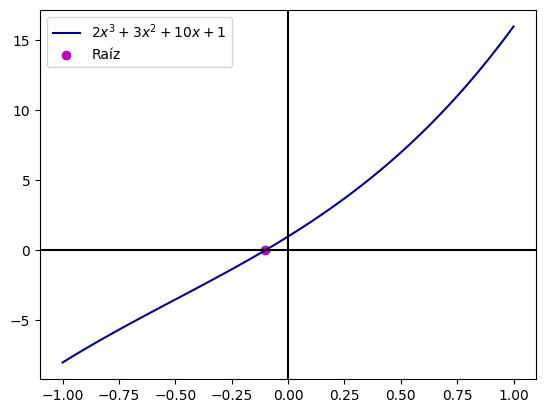

In [21]:
def funcion(x):
    return 2*x**3+3*x**2+10*x+1
x = np.linspace(-1, 1, 100)

plt.plot(x, funcion(x), label = "$2x^3+3x^2+10x+1$",color = "darkblue")
plt.scatter(root, 0, color ="m", label = "Raíz")
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")

plt.legend()
plt.savefig("GraficoNR.png")


In [22]:
x = Symbol("x")

x0 = -2
tol = 1e-6

max_iter = 100

def f(x):
    return exp(x)+x**2-4

def newton_rapson(x0,tol,max_iter):
    cont = 0
    for i in range(max_iter):
        fx0 = f(x0)
        dfx0 = diff(f(x),x).subs(x,x0)
        x1 = x0 - float(fx0/dfx0)
        #print("x"+str(i),x1)
        if abs(x1-x0) < tol:
            return x1
        x0 = x1
        cont+=1
        #print("Cantidad de Iteraciones: ", cont)
    return None
root = newton_rapson(x0,tol,max_iter)

print("La raíz es: ", root)


La raíz es:  -1.9646355974888647


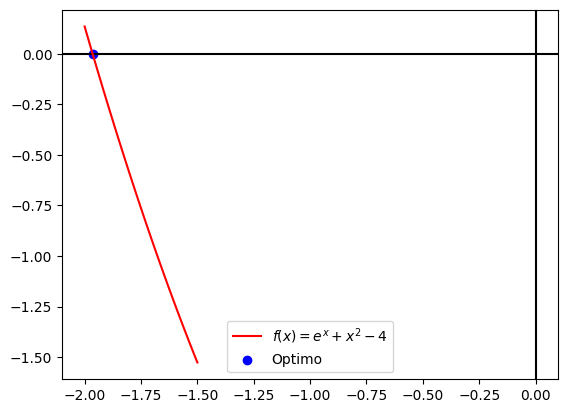

In [23]:
def f(x):
    return np.exp(x)+x**2-4
    
x= np.linspace(-2,-1.5,100)


plt.axhline(0, color = "black")
plt.axvline(0, color = "black")

plt.plot(x , f(x), label = "$f(x) = e^x+x^2-4$", color = "red")
plt.scatter(root,0, label = "Optimo", color = "blue")

plt.legend()


In [24]:
x = Symbol("x")

x0 = -2
tol = 1e-6

max_iter = 100

def f(x):
    return x**3-atan(x)

def newton_rapson(x0,tol,max_iter):
    cont = 0
    for i in range(max_iter):
        fx0 = f(x0)
        dfx0 = diff(f(x),x).subs(x,x0)
        x1 = x0 - float(fx0/dfx0)
        #print("x"+str(i),x1)
        if abs(x1-x0) < tol:
            return x1
        x0 = x1
        cont+=1
        #print("Cantidad de Iteraciones: ", cont)
    return None
root = newton_rapson(x0,tol,max_iter)

print("La raíz es: ", root)

La raíz es:  -0.9020254924297008


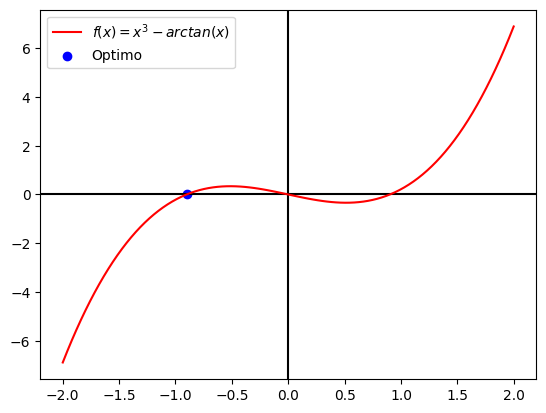

In [25]:
def f(x):
    return x**3-np.arctan(x)
    
x= np.linspace(-2,2,100)


plt.axhline(0, color = "black")
plt.axvline(0, color = "black")

plt.plot(x , f(x), label = "$f(x) = x^3-arctan(x)$", color = "red")
plt.scatter(root,0, label = "Optimo", color = "blue")

plt.legend()